In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
df=pd.read_csv('D:\Projects\DATA_ANALYST_PROJECTS\Customer Segmentation Analysis\data\Mall_Customers.csv')

# Display the First Few row of Dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Dimension of Dataset
print(f'Dimension of dataset :{df.shape}')

Dimension of dataset :(200, 5)


In [4]:
# Summary Statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Display Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Checking Missing Values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Dropping unnecessary column
df=df.drop('CustomerID',axis=1)

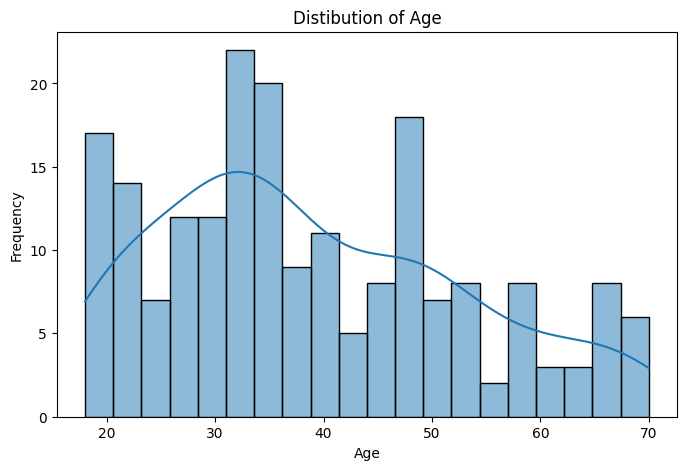

In [8]:
# Visualizing the Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],kde=True,bins=20)
plt.title('Distibution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

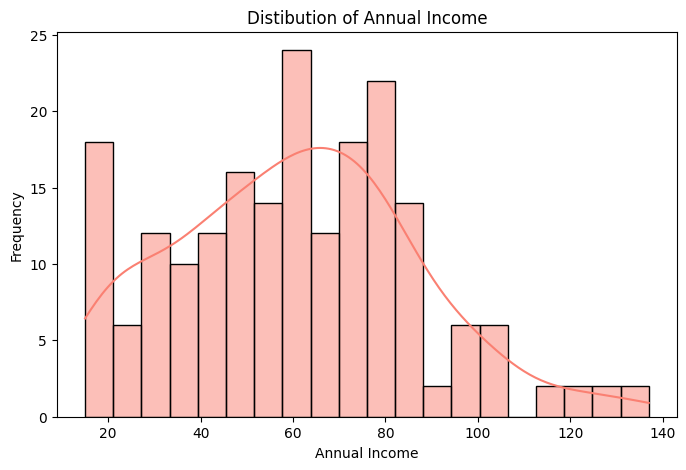

In [9]:
# Visualizing the Distribution of Annual Income (k$)
plt.figure(figsize=(8,5))
sns.histplot(df['Annual Income (k$)'],kde=True,bins=20,color='salmon')
plt.title('Distibution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

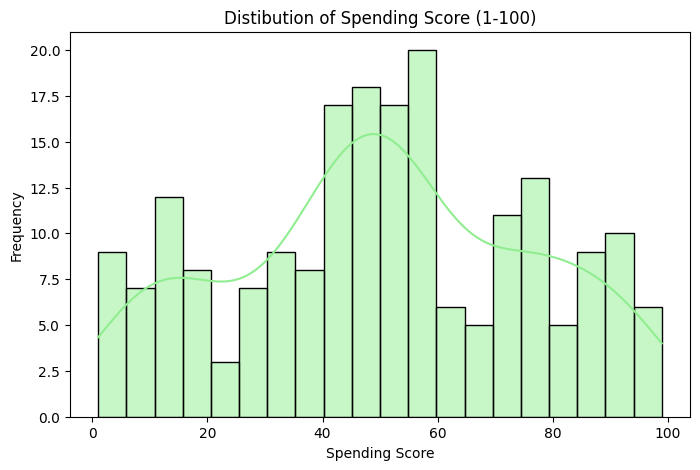

In [10]:
# Visualizing the Distribution of Spending Score (1-100)
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score (1-100)'],kde=True,bins=20,color='lightgreen')
plt.title('Distibution of Spending Score (1-100)')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

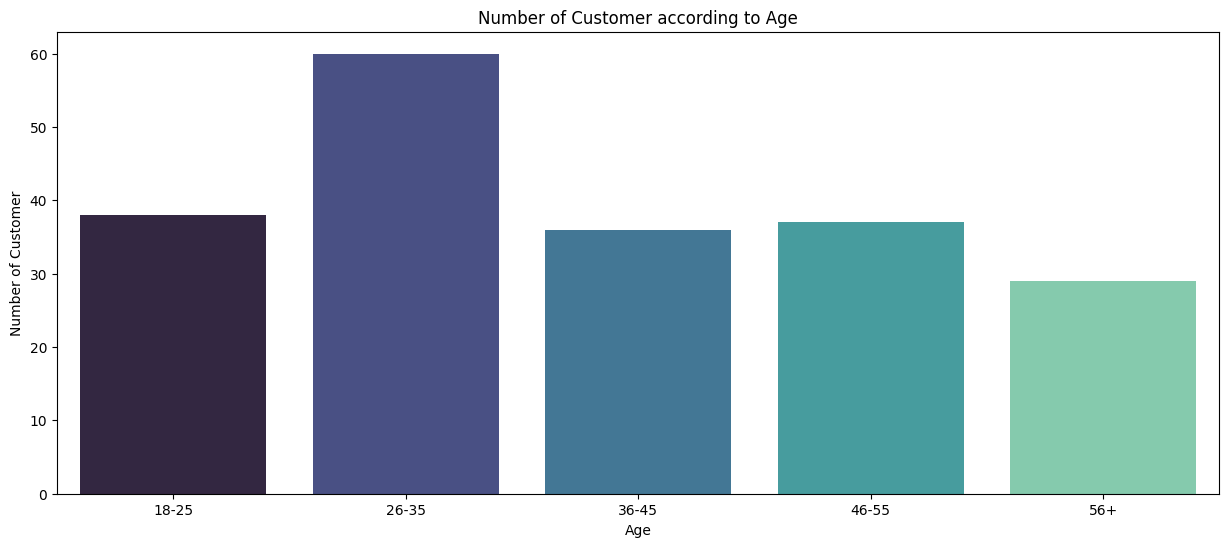

In [11]:
age_18_25=df['Age'][(df['Age']>=18)&(df['Age']<=25)]
age_26_35=df['Age'][(df['Age']>=26)&(df['Age']<=35)]
age_36_45=df['Age'][(df['Age']>=36)&(df['Age']<=45)]
age_46_55=df['Age'][(df['Age']>=46)&(df['Age']<=55)]
age_56_above=df['Age'][(df['Age']>=56)]

agex=['18-25','26-35','36-45','46-55','56+']
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56_above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Number of Customer according to Age')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

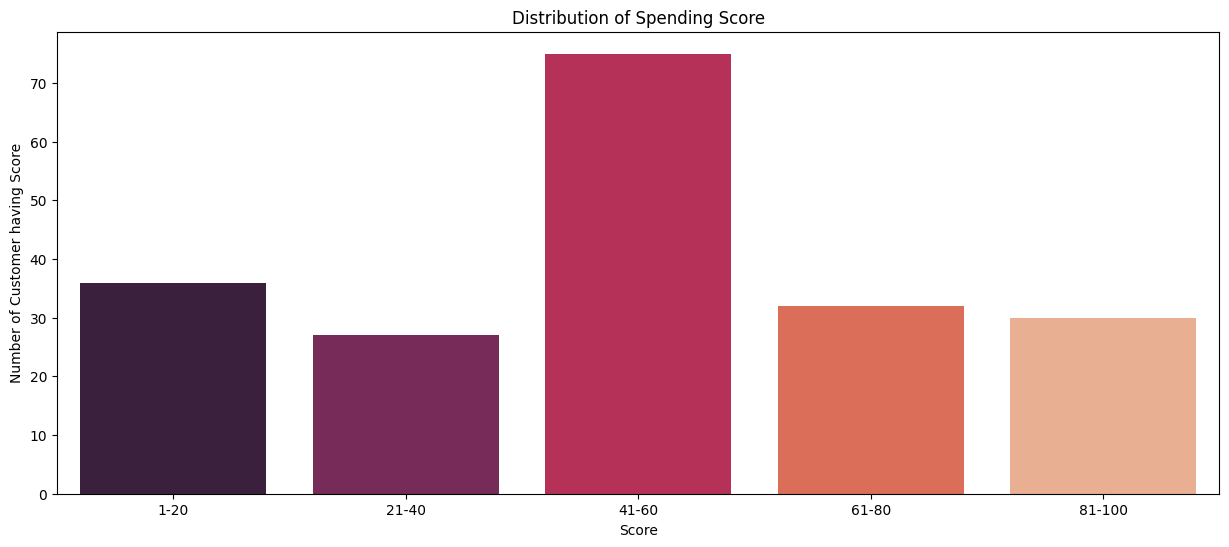

In [12]:
ss_1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1)&(df['Spending Score (1-100)']<=20)]
ss_21_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21)&(df['Spending Score (1-100)']<=40)]
ss_41_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41)&(df['Spending Score (1-100)']<=60)]
ss_61_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61)&(df['Spending Score (1-100)']<=80)]
ss_81_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81)&(df['Spending Score (1-100)']<=100)]

ssx=['1-20','21-40','41-60','61-80','81-100']
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title('Distribution of Spending Score')
plt.xlabel('Score')
plt.ylabel('Number of Customer having Score')
plt.show()

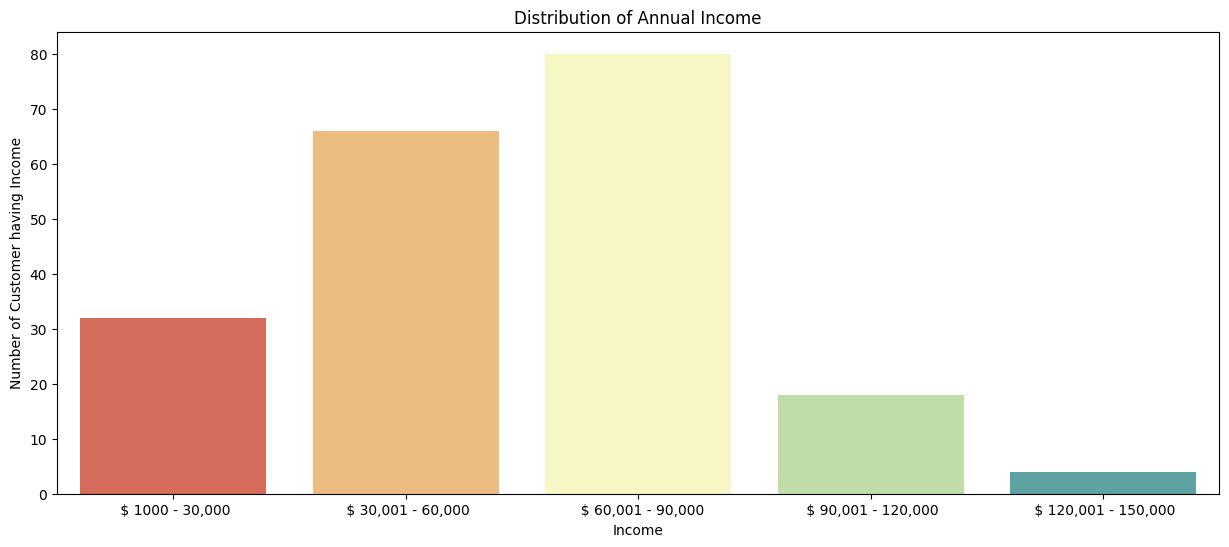

In [13]:
ai_1_30=df['Annual Income (k$)'][(df['Annual Income (k$)']>=1)&(df['Annual Income (k$)']<=30)]
ai_31_60=df['Annual Income (k$)'][(df['Annual Income (k$)']>=31)&(df['Annual Income (k$)']<=60)]
ai_61_90=df['Annual Income (k$)'][(df['Annual Income (k$)']>=61)&(df['Annual Income (k$)']<=90)]
ai_91_120=df['Annual Income (k$)'][(df['Annual Income (k$)']>=91)&(df['Annual Income (k$)']<=120)]
ai_121_150=df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]

aix=[' $ 1000 - 30,000',' $ 30,001 - 60,000','  $ 60,001 - 90,000',' $ 90,001 - 120,000',' $ 120,001 - 150,000']
aiy=[len(ai_1_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette='Spectral')
plt.title('Distribution of Annual Income')
plt.xlabel('Income')
plt.ylabel('Number of Customer having Income')
plt.show()

In [14]:
# Data Preprocessing
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
df_scaled=pd.DataFrame(df_scaled,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


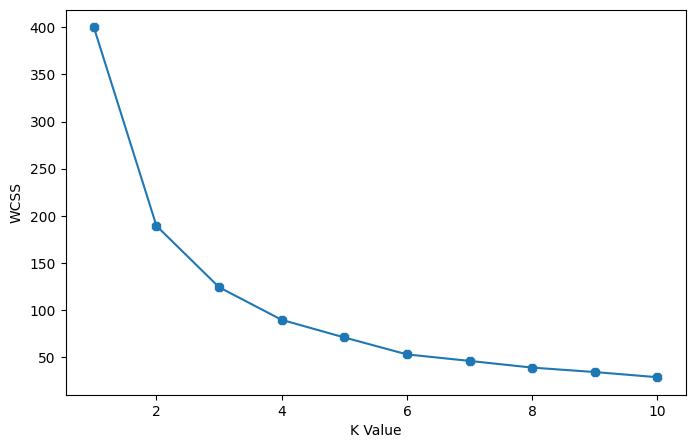

In [15]:
# Clustering on bases of Age and Spending score
X1=df_scaled.loc[:,['Age','Spending Score (1-100)']].values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans=KMeans(n_clusters=4,init='k-means++')
cluster=kmeans.fit_predict(X1)

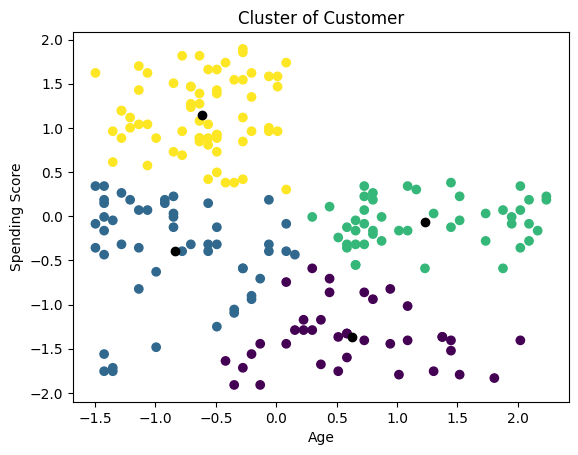

In [17]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customer')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


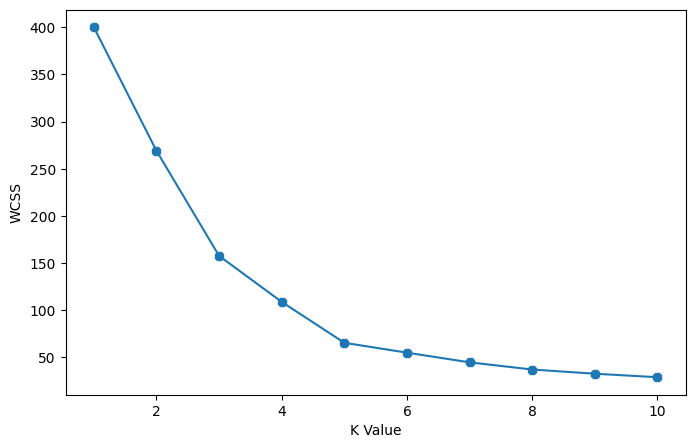

In [18]:
# Clustering on bases of Annual Income and Spending Score
X2=df_scaled.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(k,init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans=KMeans(5,init='k-means++')
cluster=kmeans.fit_predict(X2)


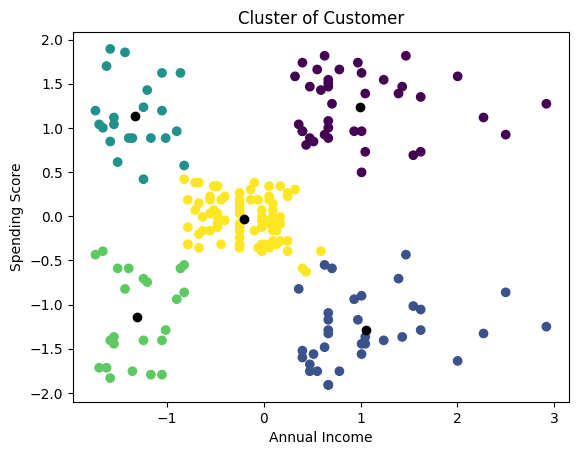

In [20]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='Black')
plt.title('Cluster of Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

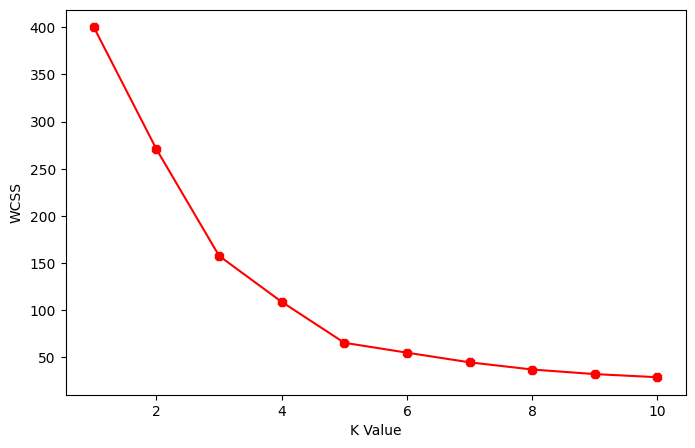

In [21]:
X3=df_scaled.iloc[:,1:].values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(k,init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()


In [22]:
# Using KneeLocator for finding best clustering value
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

5

In [23]:
kmeans=KMeans(5,init='k-means++')
cluster=kmeans.fit_predict(X3)
cluster

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [24]:
df['cluster']=cluster
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,4
197,Male,32,126,74,1
198,Male,32,137,18,4


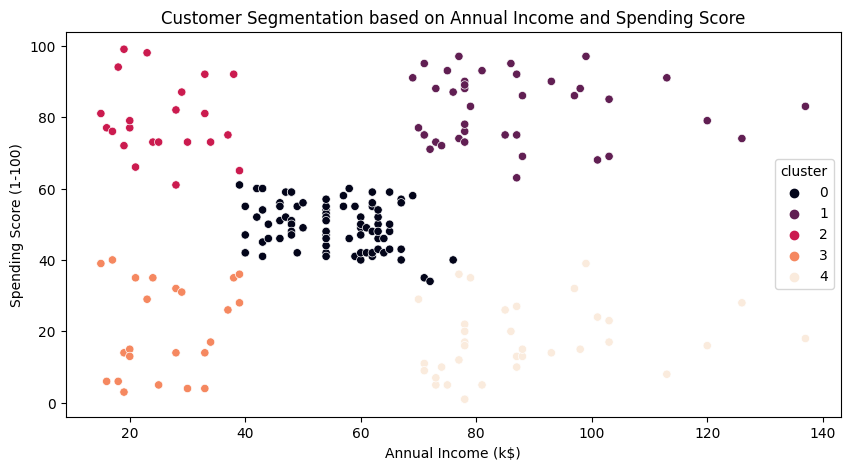

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',palette='rocket')
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [26]:
cluster_analysis=df.groupby('cluster').mean()
cluster_analysis
# We calculate the mean to understand the average characteristics of each cluster in customer segmentation analysis.

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


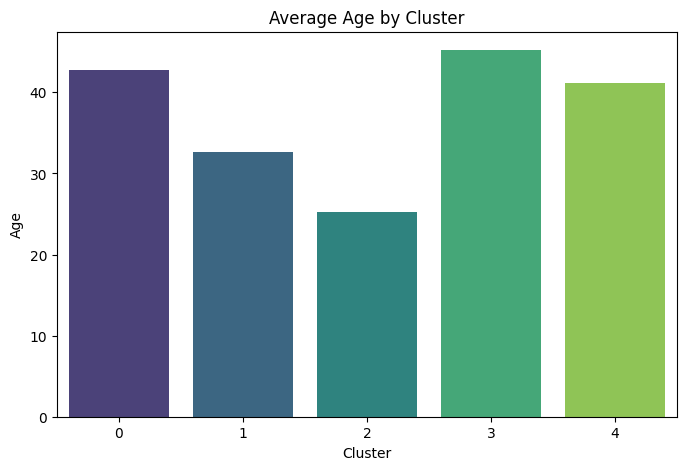

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data=cluster_analysis,x=cluster_analysis.index,y='Age',palette='viridis')
plt.title('Average Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

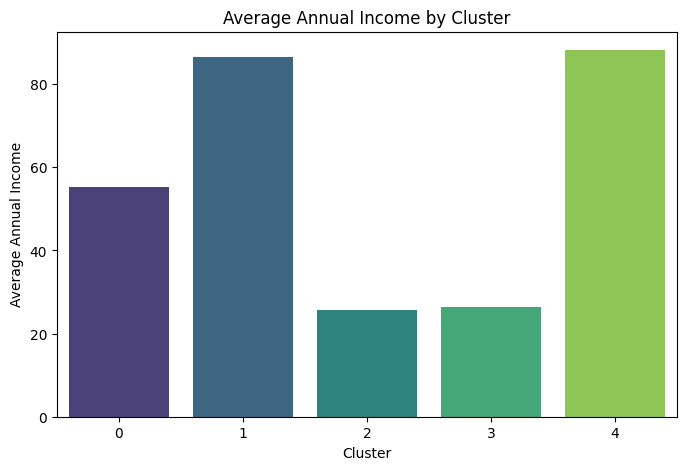

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(data=cluster_analysis,x=cluster_analysis.index,y='Annual Income (k$)',palette='viridis')
plt.title('Average Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Annual Income')
plt.show()

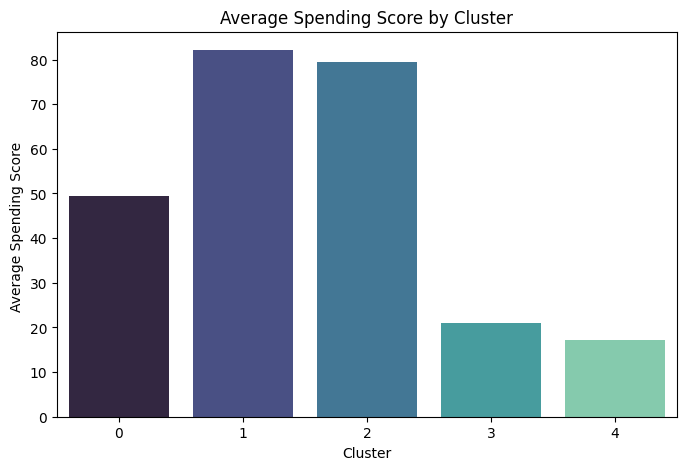

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=cluster_analysis,x=cluster_analysis.index,y='Spending Score (1-100)',palette='mako')
plt.title('Average Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score ')
plt.show()

In [30]:
print("Insight and Recommendation")
for i,row in cluster_analysis.iterrows():
    print(f'\nCluster {i}:')
    print(f"Average Age:{row ['Age']:.0f}")
    print(f"Average Annual Income (k$):{row ['Annual Income (k$)']:.2f}")
    print(f"Average Spending Score:{row ['Spending Score (1-100)']:.2f}")

print(f'\nConclusion:')
print('These Segment can be used to tailor different marketing strategies and product offers to meet the need of Customer groups')


Insight and Recommendation

Cluster 0:
Average Age:43
Average Annual Income (k$):55.30
Average Spending Score:49.52

Cluster 1:
Average Age:33
Average Annual Income (k$):86.54
Average Spending Score:82.13

Cluster 2:
Average Age:25
Average Annual Income (k$):25.73
Average Spending Score:79.36

Cluster 3:
Average Age:45
Average Annual Income (k$):26.30
Average Spending Score:20.91

Cluster 4:
Average Age:41
Average Annual Income (k$):88.20
Average Spending Score:17.11

Conclusion:
These Segment can be used to tailor different marketing strategies and product offers to meet the need of Customer groups
